In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data

pd.set_option('display.max_columns', 50)

ratings = pd.read_csv('/data/users-score-2023.csv')
anime = pd.read_csv('/data/anime-dataset-2023.csv')


In [3]:
print(ratings.shape)
ratings.head()

(24325191, 5)


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [4]:
print(anime.shape)
anime.head()

(24905, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...




---



exploring anime-dataset-2023.csv

In [5]:
# find unknown values

(anime == 'UNKNOWN').sum()

anime_id            0
Name                0
English name    14577
Other name        128
Score            9213
Genres           4929
Synopsis            0
Type               74
Episodes          611
Aired               0
Premiered       19399
Status              0
Producers       13350
Licensors       20170
Studios         10526
Source              0
Duration            0
Rating            669
Rank             4612
Popularity          0
Favorites           0
Scored By        9213
Members             0
Image URL           0
dtype: int64

In [6]:
# count of anime genre occurence

filter_unknowns = anime[anime['Genres'] != 'UNKNOWN']
split_genres = filter_unknowns['Genres'].str.split(', ').explode().value_counts()
genre_count = pd.DataFrame(split_genres).reset_index()
genre_count.columns = ['Genre', 'Count']
genre_count

,Genre,Count
0,Comedy,7142
1,Fantasy,5306
2,Action,4730
3,Adventure,3842
4,Sci-Fi,3091
5,Drama,2836
6,Romance,2063
7,Slice of Life,1755
8,Supernatural,1494
9,Hentai,1486


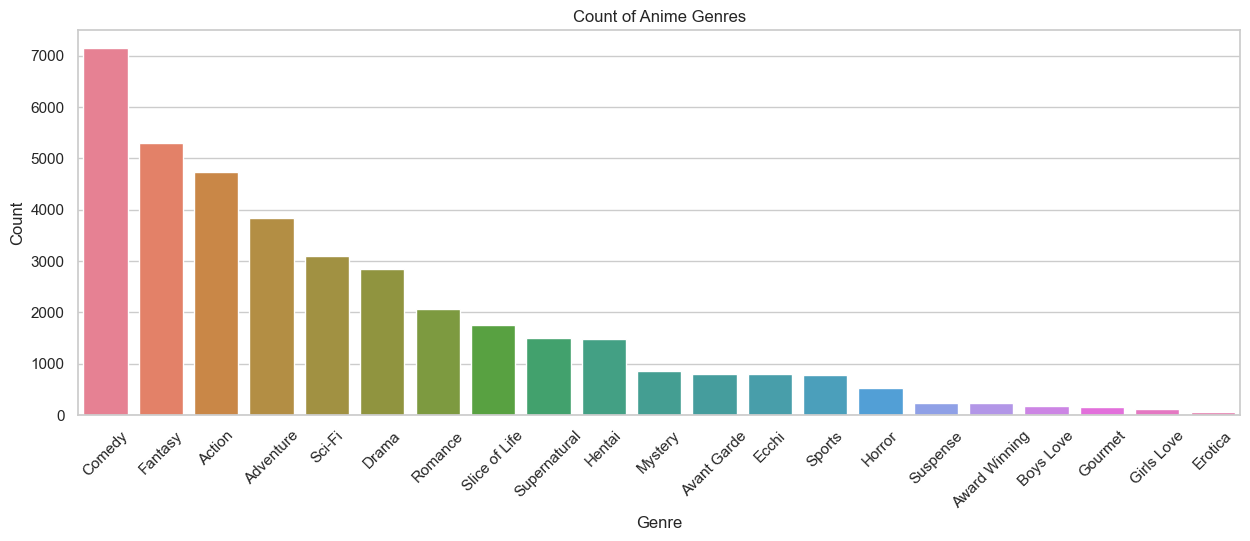

In [7]:
plt.figure(figsize=(15, 5))

sns.set(style='whitegrid')
sns.barplot(data=genre_count, x='Genre', y='Count', hue='Genre', legend=False)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Anime Genres')

plt.xticks(rotation=45)
plt.show()

In [8]:
# count of anime types

anime_types = anime['Type'].explode().value_counts()
type_count = pd.DataFrame(anime_types).reset_index()
type_count.columns = ['Anime Type', 'Count']
type_count

,Anime Type,Count
0,TV,7597
1,Movie,4381
2,OVA,4076
3,ONA,3533
4,Music,2686
5,Special,2558
6,UNKNOWN,74


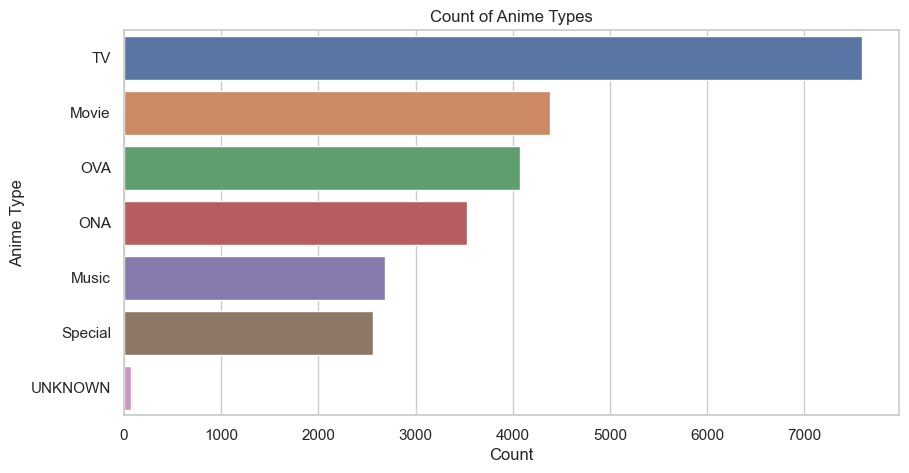

In [9]:
plt.figure(figsize=(10, 5))

sns.set(style='whitegrid')
sns.barplot(data=type_count, x='Count', y='Anime Type', hue='Anime Type', legend=False)

plt.xlabel('Count')
plt.ylabel('Anime Type')
plt.title('Count of Anime Types')

plt.show()


In [10]:
# animes produced per decade

anime['Year'] = anime['Aired'].str.extract(r'(\d{4})')
anime = anime.dropna(subset=['Year'])
anime.loc[:, 'Year'] = anime['Year'].astype(int)
anime.loc[:, 'Decade'] = (anime['Year'] // 10) * 10
decade_count = anime['Decade'].value_counts().sort_index().reset_index()
decade_count.columns = ['Decade', 'Number of Anime']
decade_count


,Decade,Number of Anime
0,1910,26
1,1920,40
2,1930,112
3,1940,37
4,1950,101
5,1960,281
6,1970,549
7,1980,1492
8,1990,2369
9,2000,4785


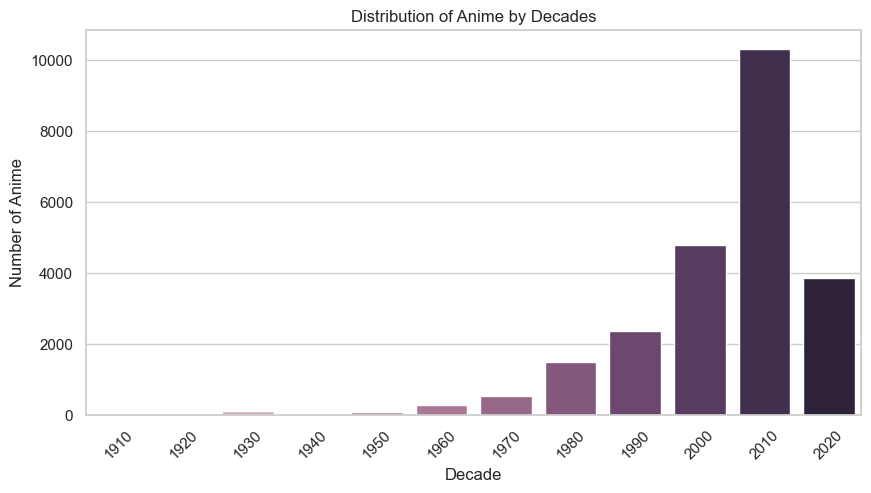

In [11]:
plt.figure(figsize=(10, 5))

sns.set(style='whitegrid')
sns.barplot(data=decade_count, x='Decade', y='Number of Anime', hue='Decade', legend=False)

plt.xlabel('Decade')
plt.ylabel('Number of Anime')
plt.title('Distribution of Anime by Decades')

plt.xticks(rotation=45)
plt.show()


In [12]:
# number of anime produced per studio

filter_unknowns = anime[anime['Studios'] != 'UNKNOWN']
anime_studios = filter_unknowns['Studios'].explode().value_counts()
studio_count = pd.DataFrame(anime_studios).reset_index()
studio_count.columns = ['Studio', 'Animes Produced']
studio_count.head(10)

,Studio,Animes Produced
0,Toei Animation,831
1,Sunrise,525
2,J.C.Staff,384
3,Shanghai Animation Film Studio,335
4,Madhouse,331
5,TMS Entertainment,317
6,Studio Deen,290
7,Production I.G,268
8,Pierrot,264
9,OLM,246


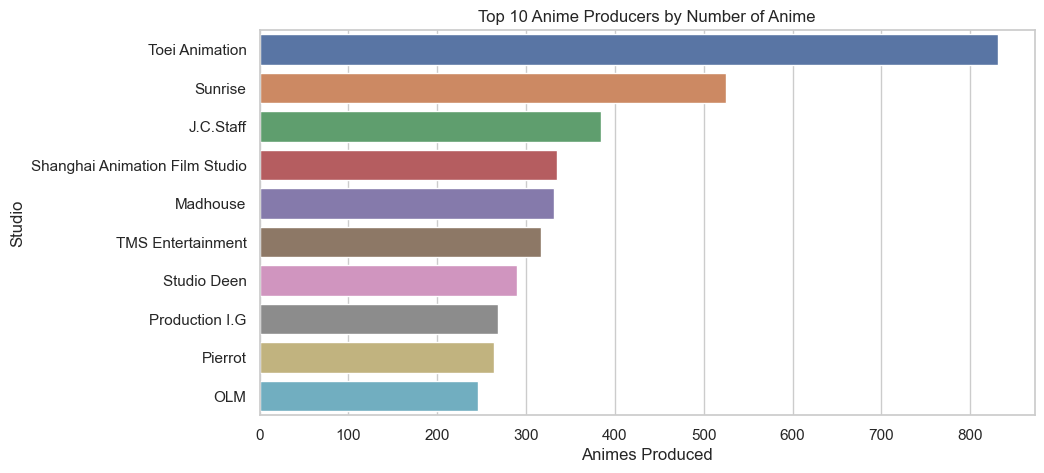

In [13]:
plt.figure(figsize=(10, 5))

sns.set(style='whitegrid')
sns.barplot(data=studio_count.head(10), x='Animes Produced', y='Studio', hue='Studio', legend=False)

plt.xlabel('Animes Produced')
plt.ylabel('Studio')
plt.title('Top 10 Anime Producers by Number of Anime')

plt.show()


In [14]:
# count of anime source

anime_source = filter_unknowns['Source'].explode().value_counts()
source_count = pd.DataFrame(anime_source).reset_index()
source_count.columns = ['Source', 'Count']
source_count

,Source,Count
0,Manga,4135
1,Original,3672
2,Unknown,1466
3,Visual novel,1052
4,Light novel,897
5,Game,868
6,Novel,566
7,Other,465
8,Web manga,338
9,4-koma manga,277


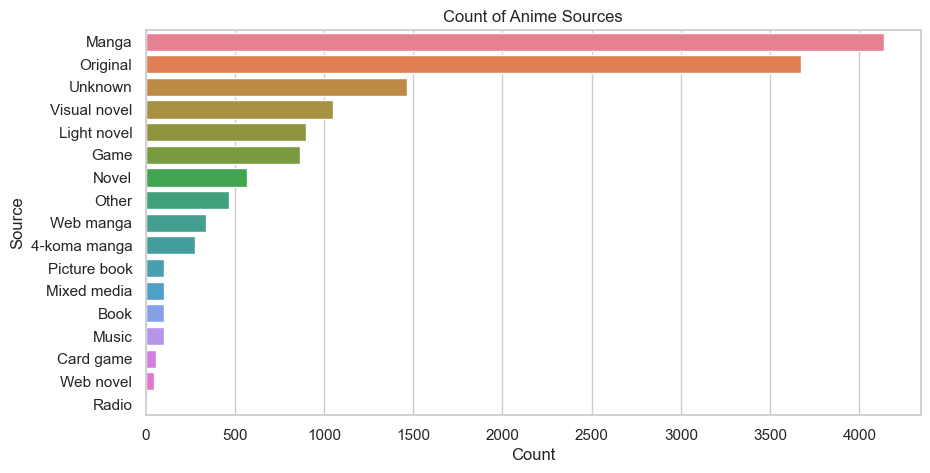

In [15]:
plt.figure(figsize=(10, 5))

sns.set(style='whitegrid')
sns.barplot(data=source_count, x='Count', y='Source', hue='Source', legend=False)

plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Count of Anime Sources')

plt.show()


In [16]:
# count of (age) ratings

filter_unknowns = anime[anime['Rating'] != 'UNKNOWN']
anime_rating = filter_unknowns['Rating'].explode().value_counts()
rating_count = pd.DataFrame(anime_rating).reset_index()
rating_count.columns = ['Rating', 'Count']
rating_count

,Rating,Count
0,PG-13 - Teens 13 or older,8396
1,G - All Ages,7523
2,PG - Children,3543
3,Rx - Hentai,1475
4,R - 17+ (violence & profanity),1396
5,R+ - Mild Nudity,1130


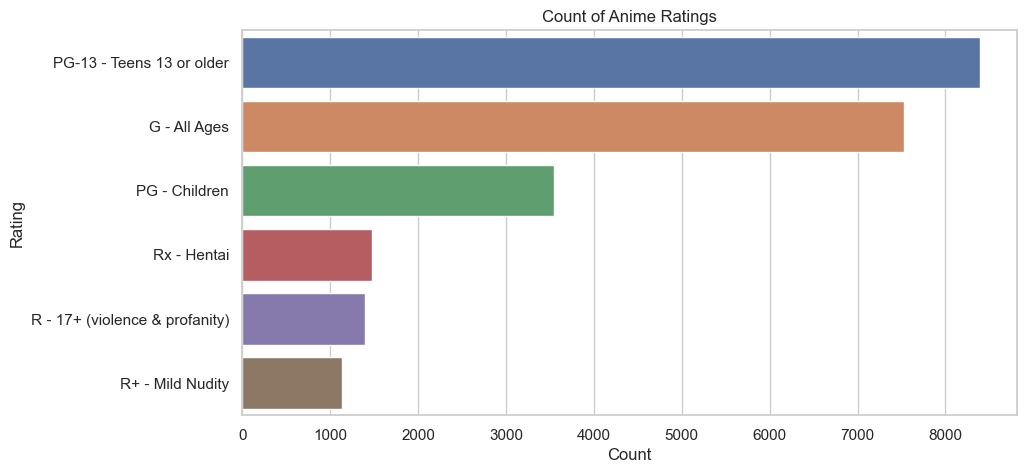

In [17]:
plt.figure(figsize=(10, 5))

sns.set(style='whitegrid')

# Use the color palette for the plot
sns.barplot(data=rating_count, x='Count', y='Rating', hue='Rating', legend=False)

plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Count of Anime Ratings')

plt.show()


In [18]:
# anime with most favorites

anime_faves = anime[['Name', 'Favorites']]
anime_faves = anime_faves.sort_values(by='Favorites', ascending=False)
anime_faves.head(10)

,Name,Favorites
3961,Fullmetal Alchemist: Brotherhood,217606
6456,Hunter x Hunter (2011),200265
11,One Piece,198986
5667,Steins;Gate,182964
1393,Death Note,167586
7428,Shingeki no Kyojin,163844
1574,Naruto: Shippuuden,107735
1431,Code Geass: Hangyaku no Lelouch,105379
20,Neon Genesis Evangelion,100638
14539,Kimetsu no Yaiba,88375


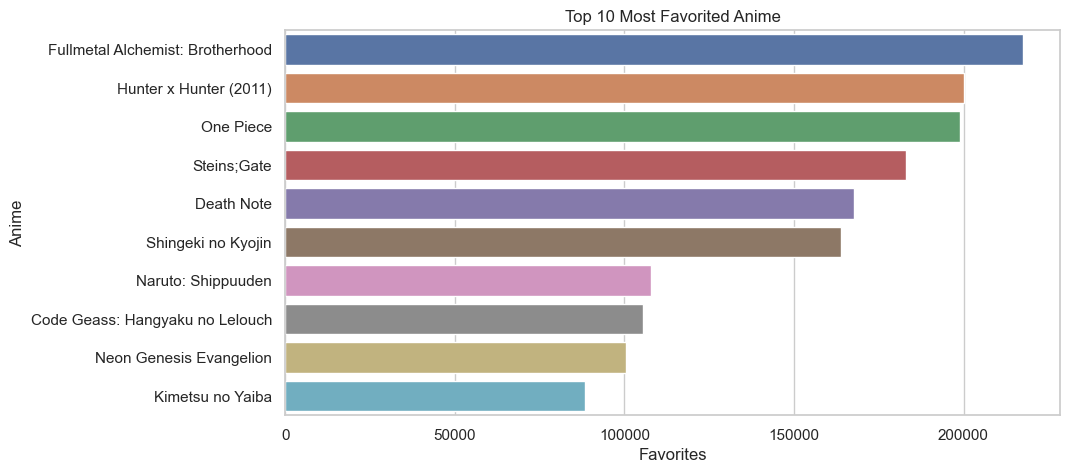

In [19]:
plt.figure(figsize=(10, 5))

sns.set(style='whitegrid')
sns.barplot(data=anime_faves.head(10), x='Favorites', y='Name', hue='Name', legend=False)

plt.xlabel('Favorites')
plt.ylabel('Anime')
plt.title('Top 10 Most Favorited Anime')

plt.show()


In [20]:
# highest ranked anime

anime_rank = anime[['Name', 'Rank']]
filter_unknowns = anime_rank[anime_rank['Rank'] != 'UNKNOWN']
anime_rank = filter_unknowns
anime_rank['Rank'] = anime_rank['Rank'].astype(float)
anime_rank = anime_rank.sort_values(by='Rank', ascending=True)

top_ten = anime_rank[(anime_rank['Rank'] >= 1) & (anime_rank['Rank'] <= 10)]
top_ten

,Name,Rank
3961,Fullmetal Alchemist: Brotherhood,1.0
16617,Bleach: Sennen Kessen-hen,2.0
5667,Steins;Gate,3.0
9880,Gintama°,4.0
17572,Kaguya-sama wa Kokurasetai: Ultra Romantic,5.0
14865,Shingeki no Kyojin Season 3 Part 2,6.0
22348,Shingeki no Kyojin: The Final Season - Kankets...,7.0
5989,Gintama',8.0
15525,Gintama: The Final,9.0
6456,Hunter x Hunter (2011),10.0


----

exploring users-score-2023.csv

In [21]:
ratings.head(10)

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
5,1,Xinil,306,Abenobashi Mahou☆Shoutengai,8
6,1,Xinil,53,Ai Yori Aoshi,7
7,1,Xinil,47,Akira,5
8,1,Xinil,591,Amaenaide yo!!,6
9,1,Xinil,54,Appleseed (Movie),7


In [22]:
# number of unique users

user_count = ratings['user_id'].value_counts()
len(user_count)

270033

In [23]:
# number of unique anime

anime_count = ratings['anime_id'].value_counts()
len(anime_count)

16500

In [24]:
# average anime ratings

rating_stats = (
    ratings.groupby("anime_id")
    .agg(avg_ratings=("rating", "mean"), total_ratings=("rating", "count"))
    .reset_index()
)

rating_stats.head(5)

,anime_id,avg_ratings,total_ratings
0,1,8.772673,64625
1,5,8.378287,29512
2,6,8.296920,38209
3,7,7.377905,10627
4,8,7.015062,1859


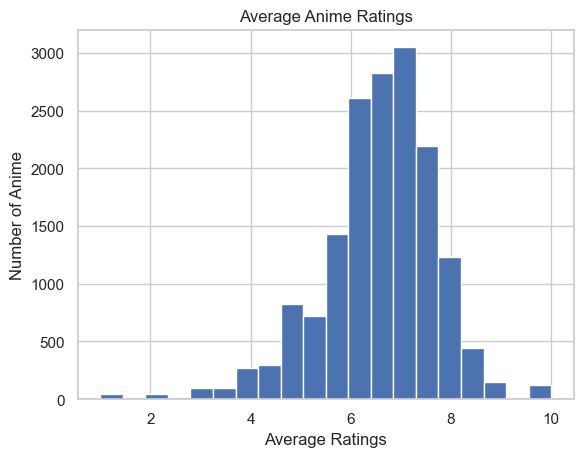

In [25]:
plt.hist(rating_stats['avg_ratings'], bins=20)
plt.title('Average Anime Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Number of Anime')
plt.show()

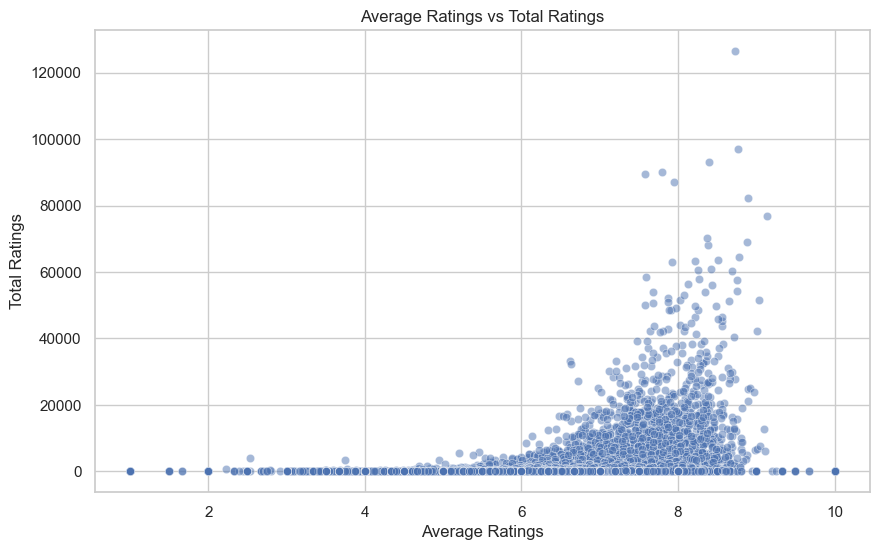

In [26]:
# average ratings vs. total number of ratings

plt.figure(figsize=(10, 6))

sns.scatterplot(x="avg_ratings", y="total_ratings", data=rating_stats, alpha=0.5)

plt.xlabel("Average Ratings")
plt.ylabel("Total Ratings")
plt.title("Average Ratings vs Total Ratings")

plt.show()